# Data Preparation

In [62]:
## Install rdrobust
!pip install rdrobust

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from rdrobust import rdrobust, rdplot

In [64]:
data = pd.read_csv('/content/RatingData.csv')

data.head()

id  month  rating  treat
0  75      4       5      0
1  75      6       5      1
2  75      6       4      0
3  75     10       4      0
4  75     10       5      0

# Part 1: Understanding ratings

**1. How did the change to the rating system affect overall ratings?**

The change in the rating system results in an average increase of 0.09492856458481524 in hotel ratings.

In [65]:
data_treat = data[data['treat'] == 1]
data_control = data[data['treat'] == 0]

In [66]:
# rating_treat_post = data[(data['month'] >- new_sys) & (data['month'] -<25)]['rating'].mean()
# rating_treat_pre = data[(data['month'] >- 0) & (data['month'] < new_sys)]['rating'].mean()
# Why is this incorrect?

In [67]:
new_sys = 13

rating_treat_post = data_treat[(data_treat['month'] >= new_sys) & (data_treat['month'] < 25)]['rating'].mean()
rating_treat_pre = data_treat[(data_treat['month'] >= 0) & (data_treat['month'] < new_sys)]['rating'].mean()
rating_diff_treat = rating_treat_post - rating_treat_pre

print(f'Post-treatment group rating: {rating_treat_post}')
print(f'Pre-treatment group rating: {rating_treat_pre}')
print(f'Difference in treatment group: {rating_diff_treat}')

Post-treatment group rating: 3.9454545454545453
Pre-treatment group rating: 3.8868255080588647
Difference in treatment group: 0.058629037395680594


In [68]:
rating_control_post = data_control[(data_control['month'] >= new_sys) & (data_control['month'] < 25)]['rating'].mean()
rating_control_pre = data_control[(data_control['month'] >= 0) & (data_control['month'] < new_sys)]['rating'].mean()
rating_diff_control = rating_control_post - rating_control_pre

print(f'Post-control group rating: {rating_control_post}')
print(f'Pre-control group rating: {rating_control_pre}')
print(f'Difference in control group: {rating_diff_control}')

Post-control group rating: 3.6776047261009666
Pre-control group rating: 3.713904253290101
Difference in control group: -0.03629952718913465


In [69]:
DID = rating_diff_treat - rating_diff_control
print(f'Difference in Difference: {DID}')

Difference in Difference: 0.09492856458481524


**2. How much statistical uncertainty is there in your answer to (1)?**

The standard error of the DID estimate is 0.027, with a p-value close to 0. The 95% confidence interval is (0.042, 0.148), which does not include 0, indicating that the result is statistically significant.

In [70]:
data['post'] = data['month'] >= new_sys
data['pre'] = data['month'] < new_sys

formula = 'rating ~ post + treat + post*treat'
model = smf.ols(formula = formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     97.73
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           5.15e-63
Time:                        03:24:42   Log-Likelihood:                -56583.
No. Observations:               38004   AIC:                         1.132e+05
Df Residuals:                   38000   BIC:                         1.132e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.7139      0

**3. What assumptions does your answer to (1) rely on, and how valid do those assumptions seem?**

1.
**Parallel Trend Assumption**

The parallel trends assumption posits that, in the absence of treatment, the changes in the average untreated potential outcomes would follow the same trend for both the treatment and control groups. In this context, it assumes that, without the intervention, the average hotel ratings on Trip Advisor (treatment group) would experience trends similar to those on Yelp (control group) over time.

Looking at the graph, the lines for the treatment and control groups exhibit similar slopes prior to the treatment period, which suggests that the parallel trends assumption holds before the intervention. However, for the assumption to be valid, we expect the lines to diverge post-treatment if the treatment has a significant effect. Since the lines continue to follow similar trends after the intervention, it suggests that the treatment might not have had a significant impact.


2.
**Absence of Confounding External Events**

For the difference-in-differences analysis to be valid, we also need to ensure that there are no external events in the post-treatment period that could influence the treatment group independently of the treatment itself.

In this case, we assume that no other external events have impacted the treatment group after the intervention. There is no evidence suggesting that factors other than the system change have affected the operations of Yelp or Trip Advisor during the post-treatment period, which supports the validity of the assumption that the treatment's effects are not confounded by other changes.


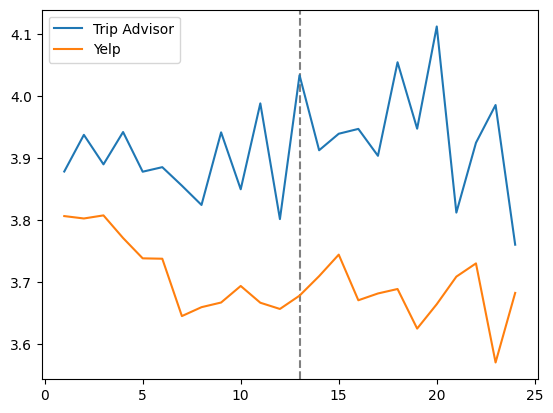

In [102]:
# Aggregating data
data_agg = data.groupby(['month', 'treat'])['rating'].agg('mean').reset_index()
agg_treat = data_agg[data_agg['treat'] == 1]
agg_control = data_agg[data_agg['treat'] == 0]

# Plotting the error bars
plt.errorbar(agg_treat['month'], agg_treat['rating'], label='Trip Advisor')
plt.errorbar(agg_control['month'], agg_control['rating'], label = 'Yelp')

# Add vertical line for 'new_sys' before the regression plots
plt.axvline(new_sys, linestyle = '--', color = 'gray')

# Split the data based on the new system
rd_above_treat = agg_treat[agg_treat['month'] >= new_sys]
rd_below_treat = agg_treat[agg_treat['month'] < new_sys]
rd_above_control = agg_control[agg_control['month'] >= new_sys]
rd_below_control = agg_control[agg_control['month'] < new_sys]

# Show the legend and plot
plt.legend()
plt.show()

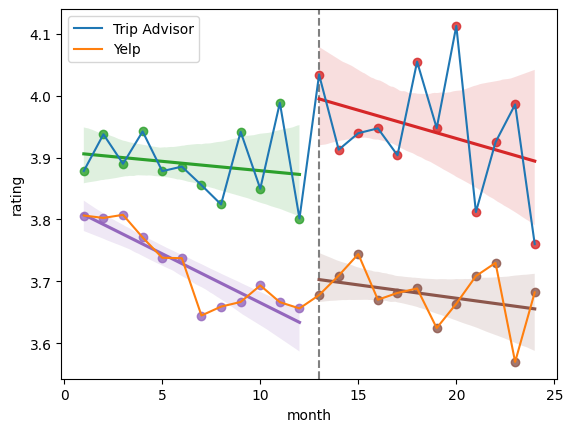

In [71]:
# Aggregating data
data_agg = data.groupby(['month', 'treat'])['rating'].agg('mean').reset_index()
agg_treat = data_agg[data_agg['treat'] == 1]
agg_control = data_agg[data_agg['treat'] == 0]

# Plotting the error bars
plt.errorbar(agg_treat['month'], agg_treat['rating'], label='Trip Advisor')
plt.errorbar(agg_control['month'], agg_control['rating'], label = 'Yelp')

# Add vertical line for 'new_sys' before the regression plots
plt.axvline(new_sys, linestyle = '--', color = 'gray')

# Split the data based on the new system
rd_above_treat = agg_treat[agg_treat['month'] >= new_sys]
rd_below_treat = agg_treat[agg_treat['month'] < new_sys]
rd_above_control = agg_control[agg_control['month'] >= new_sys]
rd_below_control = agg_control[agg_control['month'] < new_sys]

# Plot the regression lines
sns.regplot(x=rd_below_treat['month'], y=rd_below_treat['rating'])
sns.regplot(x=rd_above_treat['month'], y=rd_above_treat['rating'])
sns.regplot(x=rd_below_control['month'], y=rd_below_control['rating'])
sns.regplot(x=rd_above_control['month'], y=rd_above_control['rating'])

# Show the legend and plot
plt.legend()
plt.show()

**4. You have a colleague who believes the best way to answer our question is to look at how ratings change from before to after the system change. Why might this approach be misleading?**

1.
**Ignoring Pre-Treatment Trends and Cause Potential Confoundings**

Without accounting for the underlying trends that both Trip Advisor and Yelp may have experienced prior to the intervention, it's impossible to isolate the effect of the system change from other external influences that could have impacted the ratings (e.g. seasonal change).

2.
**Lack of Difference-in-Differences**

This approach only focuses on changes within Trip Advisor and doesn't consider a comparison with Yelp. Yelp serves as a control group. If we only look at Trip Advisor ratings, we miss the opportunity to compare the changes in ratings on Trip Advisor (treatment group) to changes on Yelp (control group).

3.
**Overlooking Potential Timing Trends**

The system change in January 2009 might have effects that are not immediately visible. If customers and hotels took some time to adjust to the new rating system, changes in ratings could occur gradually over time rather than immediately after the system change.

# Part 2: Which tip to recommend?

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from rdrobust import rdrobust, rdplot

In [75]:
tips_data = pd.read_csv('/content/tips.csv')

tips_data.head()

fare   tip  ride_duration  distance  passenger_count  day
0   2.9  0.25              2      0.25                1    2
1   2.9  1.00              2      0.28                5    6
2   2.9  1.00              2      0.28                1    3
3   2.9  0.50              1      0.29                1    6
4   2.9  0.50              2      0.16                1    5

In [76]:
tips_data['tips_perc'] = tips_data['tip'] / tips_data['fare']

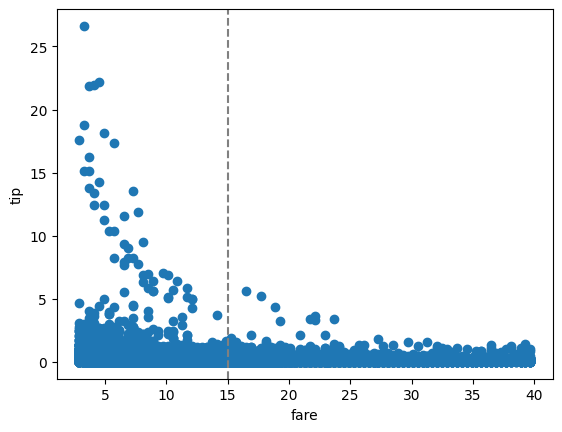

In [77]:
plt.scatter(tips_data['fare'], tips_data['tips_perc'])
plt.xlabel('fare')
plt.ylabel('tip')
plt.axvline(15, linestyle = '--', color = 'gray')
plt.show()

In [78]:
bandwidth = 1
tips_data['fare_rate'] = (tips_data['fare'] // bandwidth) * bandwidth
tips_agg = tips_data.groupby('fare_rate')['tips_perc'].mean().reset_index()
tips_agg.head()

fare_rate  tips_perc
0        2.0   0.458712
1        3.0   0.367558
2        4.0   0.298124
3        5.0   0.264666
4        6.0   0.237246

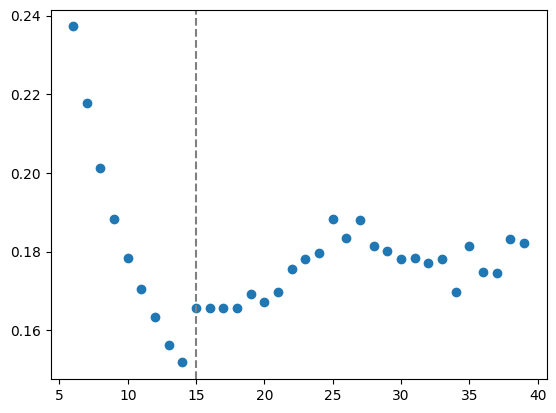

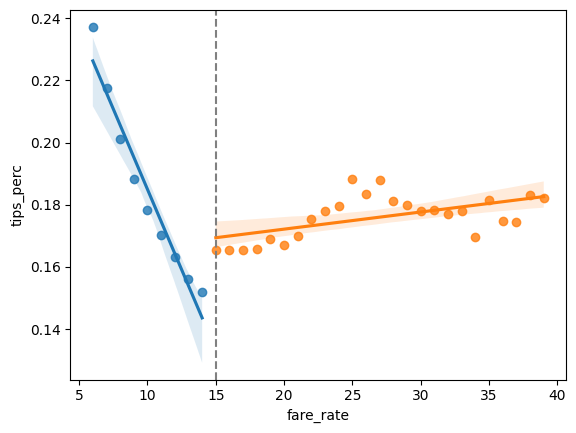

In [79]:
threshold = 15
tips_band = tips_agg[(tips_agg['fare_rate'] > 5) & (tips_agg['fare_rate'] < 40)]
plt.scatter(tips_band['fare_rate'], tips_band['tips_perc'])
plt.axvline(threshold, color = 'gray', linestyle = '--')
plt.show()

# Improved with rd_below and rd_above
rd_above = tips_band[tips_band['fare_rate'] >= threshold]
rd_below = tips_band[tips_band['fare_rate'] < threshold]

sns.regplot(x = rd_below['fare_rate'], y = rd_below['tips_perc'])
sns.regplot(x = rd_above['fare_rate'], y = rd_above['tips_perc'])
plt.axvline(threshold, color = 'gray', linestyle = '--')

**1. What is the RDD estimate of the effect of the % default on tip amount?**

RDD = 0.1643 - 0.1259 = 0.0384

In [80]:
tips_data['adjusted_fare'] = tips_data['fare'] - threshold
formula = 'tips_perc ~ adjusted_fare'

data_below = tips_data[(tips_data['fare'] > 5) & (tips_data['fare'] < threshold)]
model_db = smf.ols(formula = formula, data = data_below).fit()
print(model_db.summary())

data_above = tips_data[(tips_data['fare'] < 40) & (tips_data['fare'] >= threshold)]
model_da = smf.ols(formula = formula, data = data_above).fit()
print(model_da.summary())

                            OLS Regression Results                            
Dep. Variable:              tips_perc   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                 4.500e+04
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:24:51   Log-Likelihood:             4.0341e+05
No. Observations:              552373   AIC:                        -8.068e+05
Df Residuals:                  552371   BIC:                        -8.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1259      0.000    306.358

In [83]:
tips_agg.head()

fare_rate  tips_perc
0        2.0   0.458712
1        3.0   0.367558
2        4.0   0.298124
3        5.0   0.264666
4        6.0   0.237246

Mass points detected in the running variable.


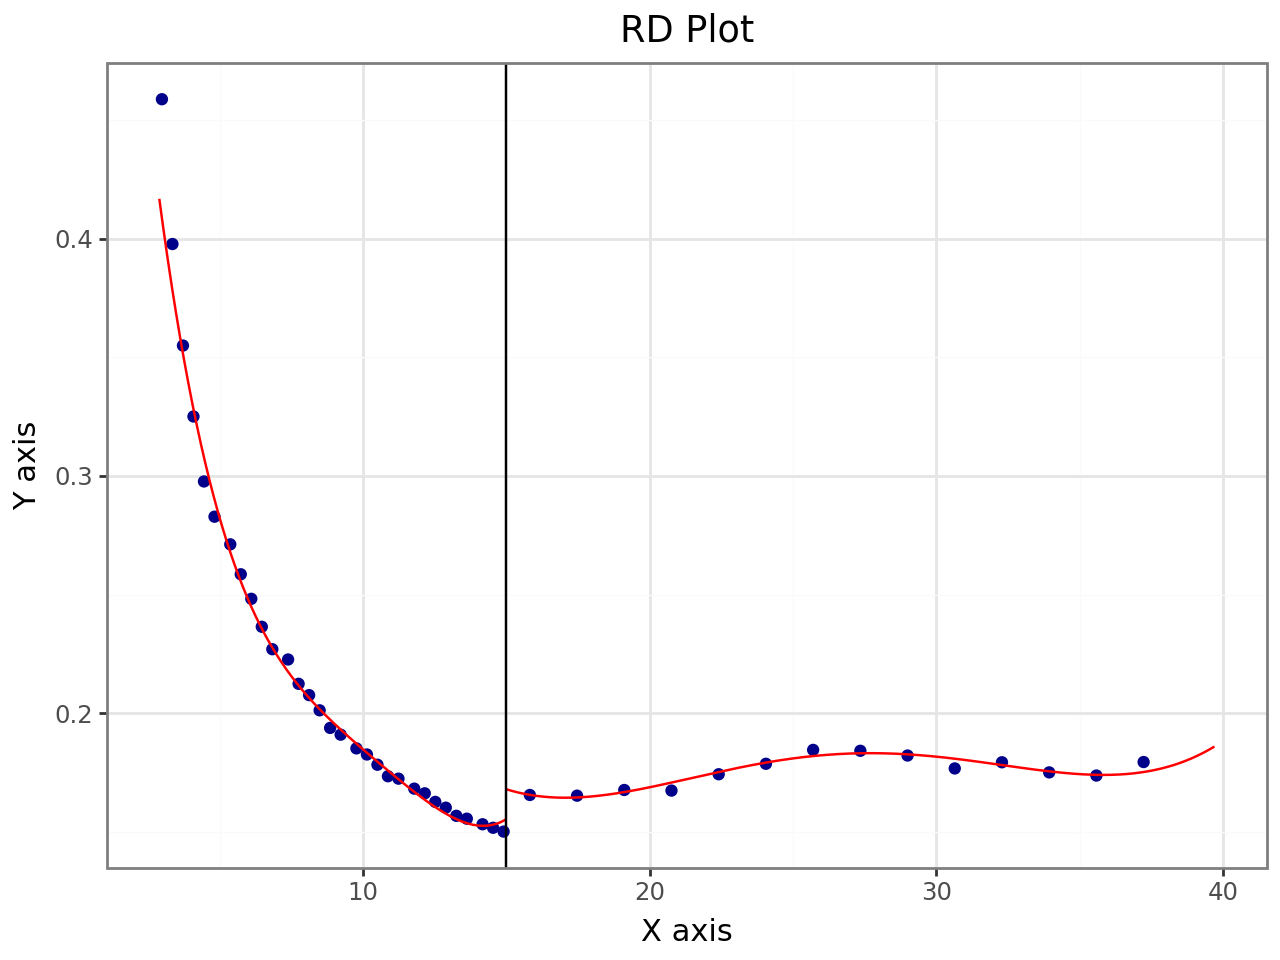

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


Mass points detected in the running variable.
Mass points detected in the running variable.


KeyboardInterrupt: 

In [86]:
# Non-aggregated data.
from rdrobust import rdplot, rdrobust
rdplot(y = tips_data['tips_perc'], x = tips_data['fare'], c=15, binselect='es')
print(rdrobust(y = tips_data['tips_perc'], x = tips_data['adjusted_fare']) )

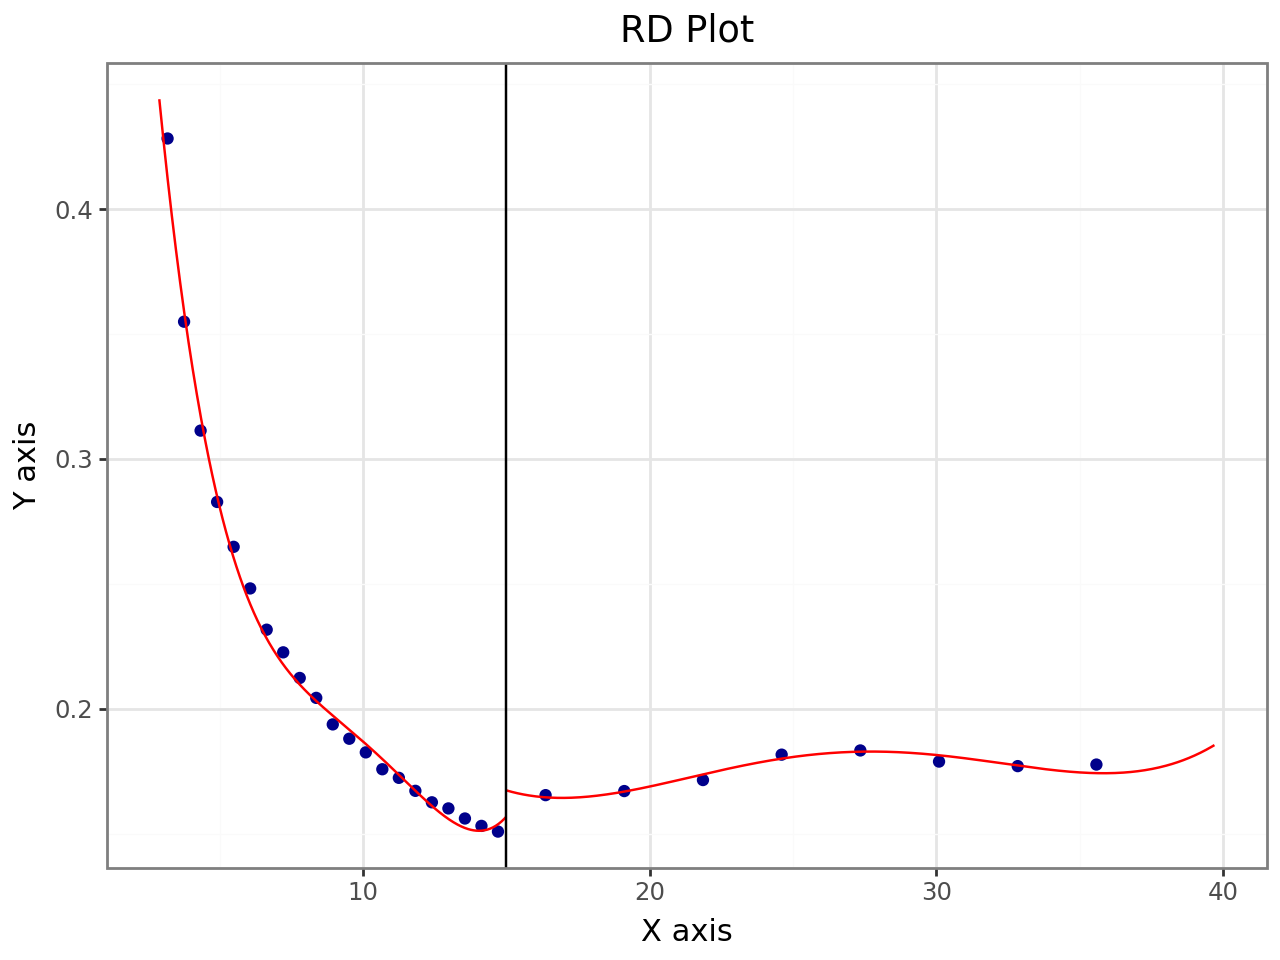

Call: rdrobust
Number of Observations:                    93
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations            31         62
Number of Unique Obs.             31         62
Number of Effective Obs.           8          7
Bandwidth Estimation            2.99       2.99
Bandwidth Bias                  4.71       4.71
rho (h/b)                      0.635      0.635

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       0.016    0.002    8.726   2.632e-18      [0.013, 0.02]
Robust                 -        -    7.268   3.661e-13     [0.012, 0.021]



In [98]:
# Aggregated data
tips_agg_fare = tips_data.groupby('fare')['tips_perc'].mean().reset_index()
tips_agg_fare['adjusted_fare'] = tips_agg_fare['fare'] - threshold

from rdrobust import rdplot, rdrobust
rdplot(y = tips_agg_fare['tips_perc'], x = tips_agg_fare['fare'], c=15, binselect='es')
print(rdrobust(y = tips_agg_fare['tips_perc'], x = tips_agg_fare['adjusted_fare']) )

**2. What assumption(s) does your estimate require for validity? Give an example of how those assumptions could go wrong.**

**1.
Scoring variable cannot be precisely manipulated.**

The running variable `fare` must be continuous around the threshold `fare = 15` to ensure that the data is not subject to manipulation or other irregularities.

In this case, when the fare is below \$15, passengers typically leave a fixed tip amount ranging from \$2 to \$4. However, if the fare exceeds \$15, passengers are more likely to leave a tip calculated as 20% to 30% of the fare, resulting in a tip range of \$3 to \$4.50. This higher tip interval could incentivize drivers to deliberately drive more slowly or take longer routes to increase the fare above \$15. Such behavior could lead to systematic manipulation of the fare data, violating the assumption of continuity in the running variable and compromising the validity of the analysis.

**2.
Scoring variable determined before the outcome.**

As previously mentioned, if drivers adjust the fare with the intention of influencing the tip amount, such as by taking longer routes or driving more slowly to increase the fare, then the assumption might be violated.

**3.
Only discontinuity at threshold is X.**

The relationship between fare and the number of passengers, as well as the relationship between fare and days, also exhibit discontinuities at the threshold of \$15.

In [99]:
max_fare = tips_data['fare'].max()
max_fare

39.7

Mass points detected in the running variable.


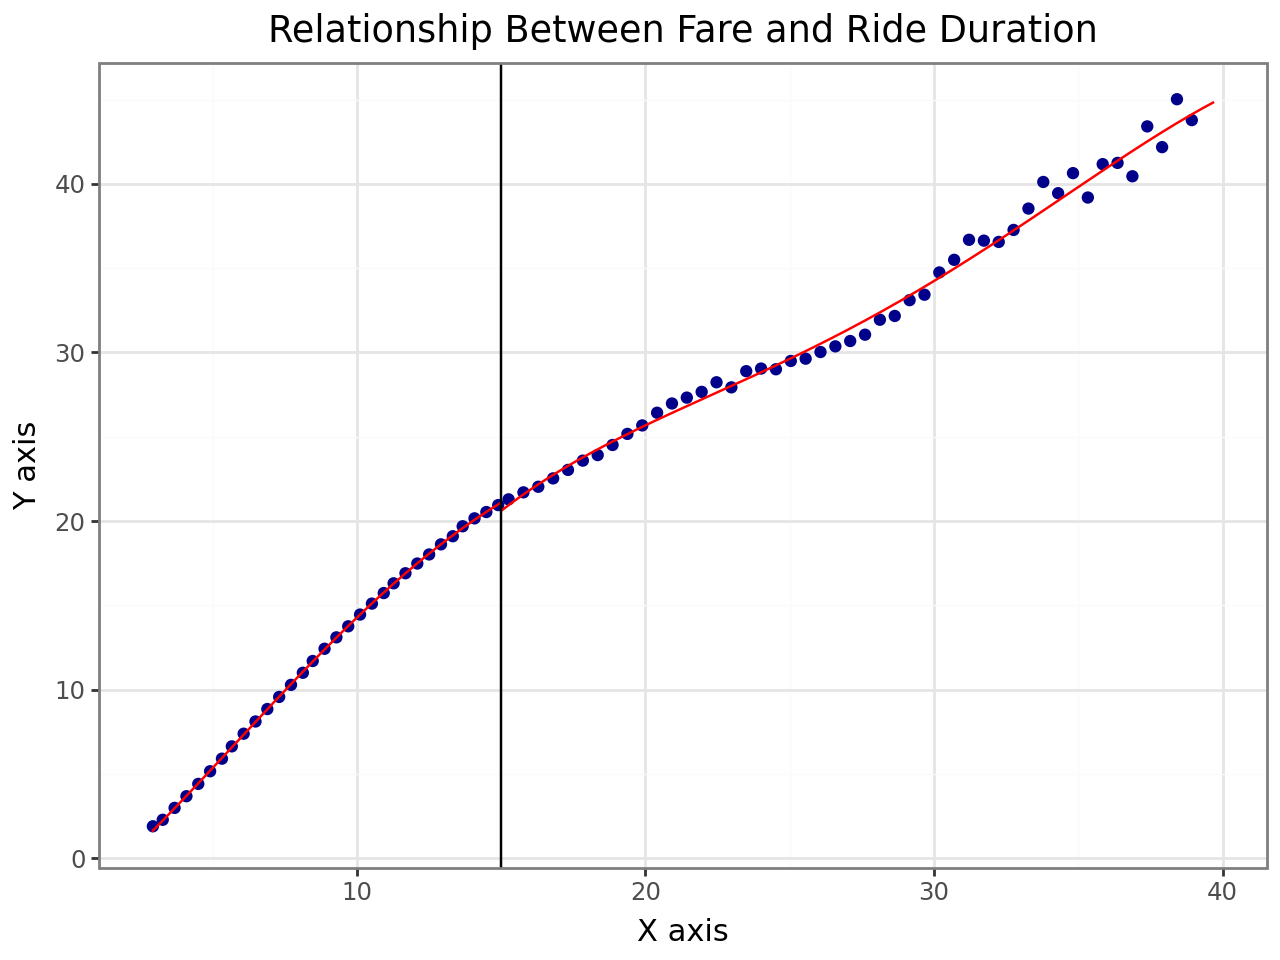

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


Mass points detected in the running variable.


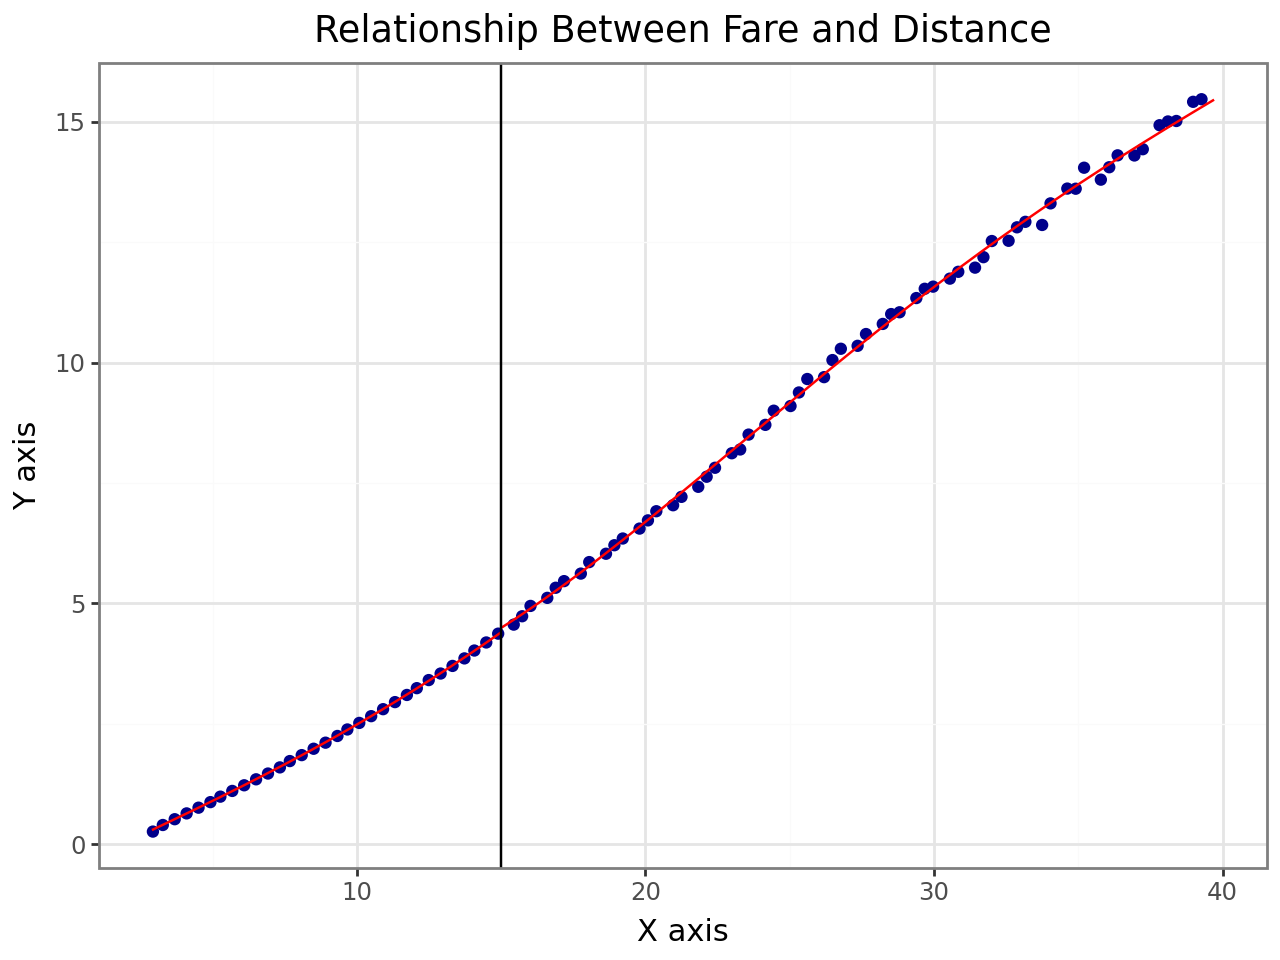

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


Mass points detected in the running variable.


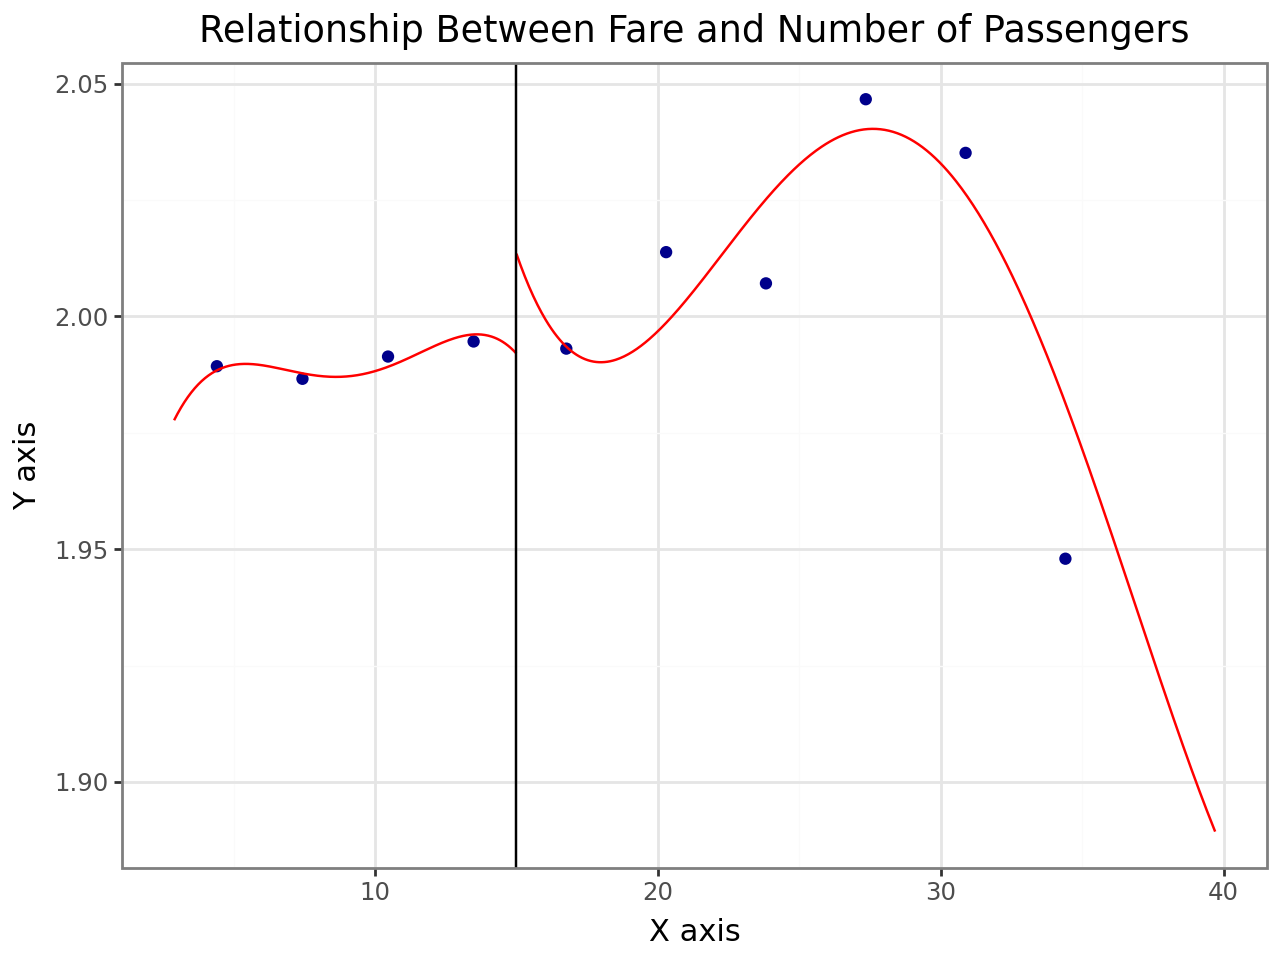

Mass points detected in the running variable.


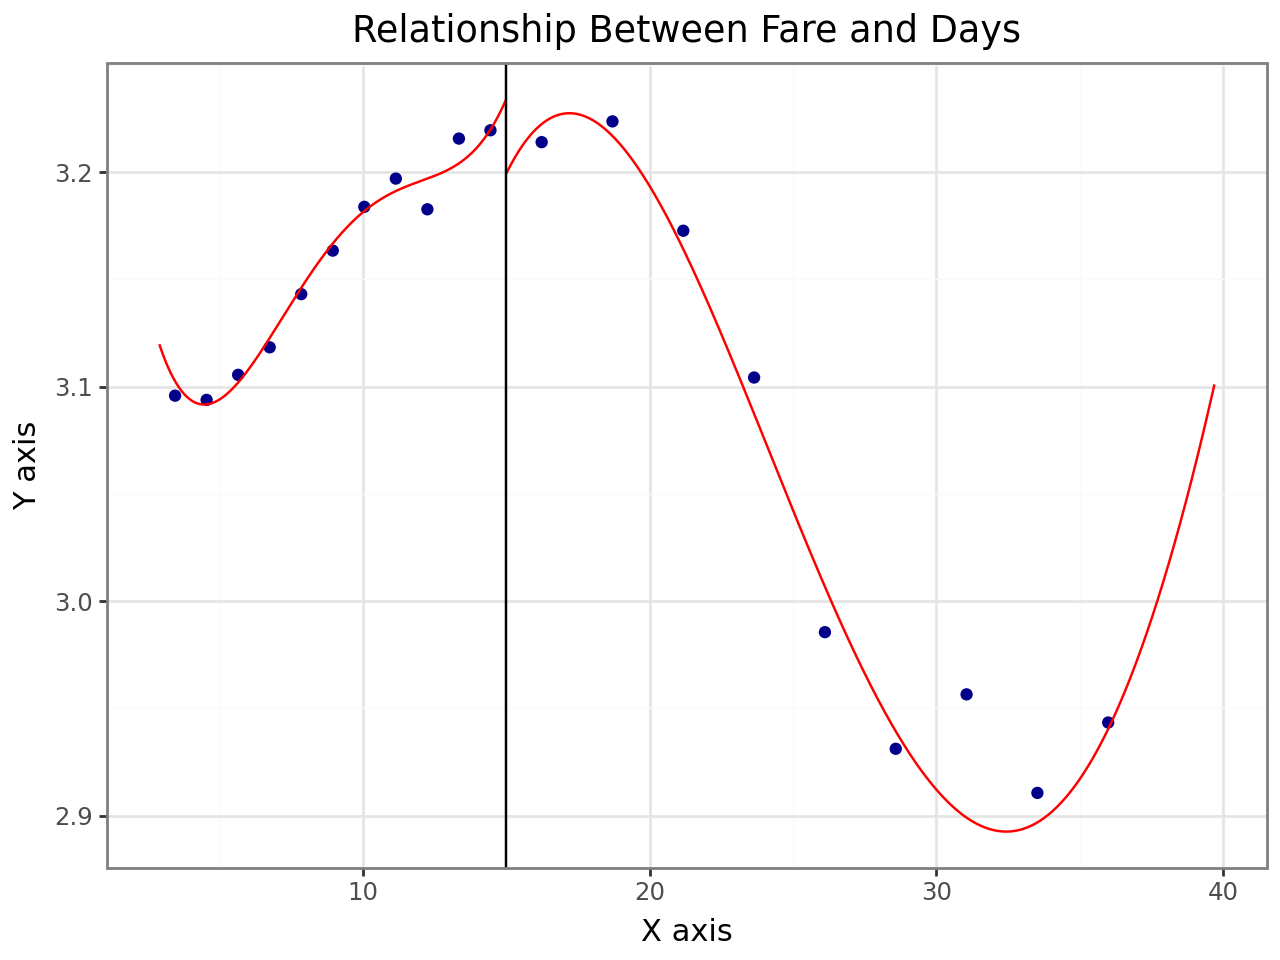

Call: rdplot
Number of Observations:                723682
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations        637910      85772
Number of Effective Obs       637910      85772
Bandwith poly. fit (h)          12.1       24.7
Number of bins scale               1          1
Bins Selected                     11         10
Average Bin Length               1.1       2.47
Median Bin Length                1.1       2.47
IMSE-optimal bins               11.0       10.0
Mimicking Variance bins       4001.0     3786.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


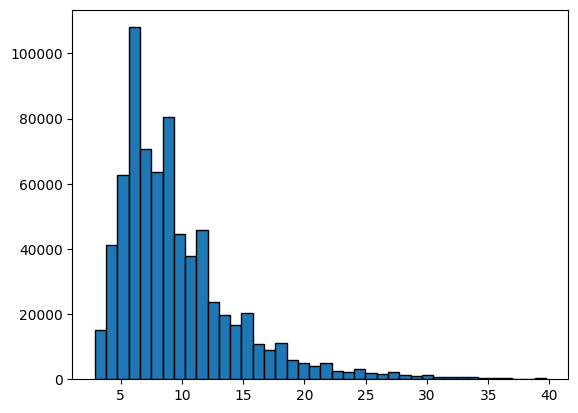

In [100]:
# Histogram
plt.hist(tips_data['fare'], bins = 40, edgecolor = 'black')

# rdplots for variables
rdplot(y = tips_data['ride_duration'], x = tips_data['fare'], c = 15, binselect='es', title = 'Relationship Between Fare and Ride Duration')
rdplot(y = tips_data['distance'], x = tips_data['fare'], c = 15, binselect = 'es', title = 'Relationship Between Fare and Distance')
rdplot(y = tips_data['passenger_count'], x = tips_data['fare'], c = 15, binselect = 'es', title = 'Relationship Between Fare and Number of Passengers')
rdplot(y = tips_data['day'], x = tips_data['fare'], c = 15, binselect = 'es', title = 'Relationship Between Fare and Days')

**3. What evidence can you provide to show (a) that there really is an effect of tip default on topping, and (b) that your RDD is valid? Your answer here should be a few plots, along with discussion of what the plots show and why they are informative.**

(a) The RD plot reveals a clear discontinuity in tip percentage at the \$15 threshold. Additionally, the regression line in the scatter plot also indicates a noticeable jump in tip percentage at this point. These findings strongly suggest that the default tipping policy has a significant effect on tipping behavior.

(b) The continuity analysis of the pre-experiment variables and the corresponding plots reveal a discontinuity in the number of passengers and days. However, the observed jumps are relatively small. Therefore, we can conclude that the distribution of pre-experiment variables is generally smooth at the threshold. Nonetheless, since the route is determined by the app and delaying driving speed could reduce the number of orders a driver receives, further analysis and experiments are required to confirm whether any data manipulation takes place in this context.


**4. What tip default would you recommend that a taxi company use? Explain.**

I recommend the taxi company adopt a percentage-based default tip (e.g., 15%, 20%, 25%). Low fares often lead to high tip percentages due to the low base fare, as passengers rarely leave tips below \$1. Analysis indicates that switching to a percentage-based default significantly increases tip percentages at the \$15 threshold. This strategy is particularly effective for higher fares, ensuring fair compensation for drivers on longer trips.